In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = 'C:/Users/iris168'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/iris168\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


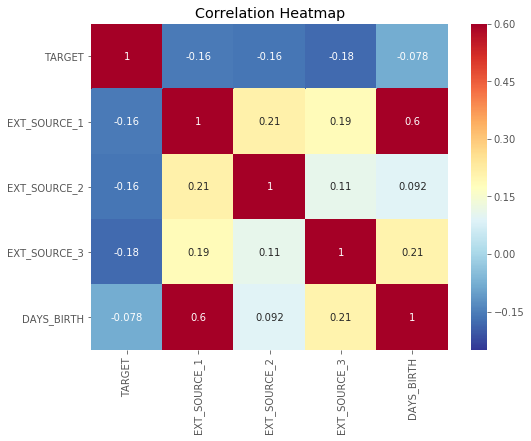

In [4]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

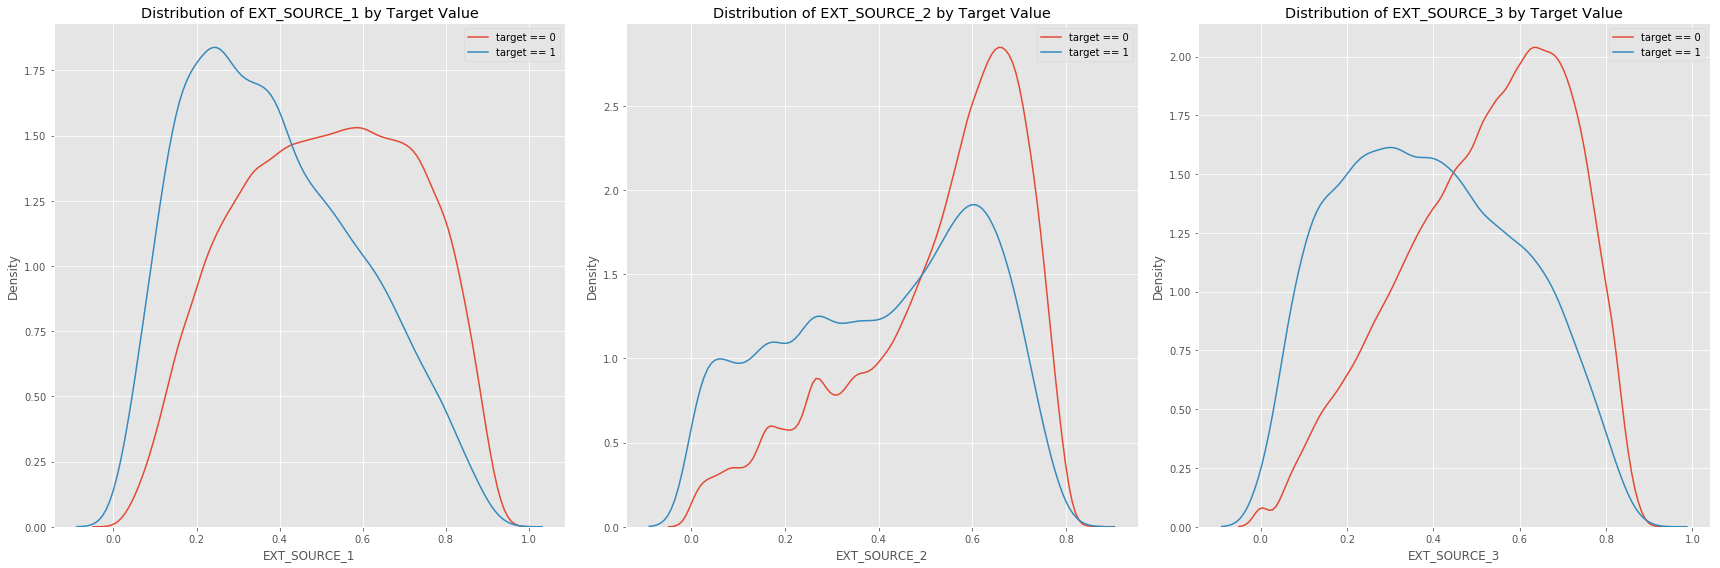

In [5]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# 依不同 EXT_SOURCE 逐項繪製 KDE 圖形
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE 圖形
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # 加上各式圖形標籤
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [6]:
enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

In [7]:
list(enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']))

[(0, 'EXT_SOURCE_1'), (1, 'EXT_SOURCE_2'), (2, 'EXT_SOURCE_3')]

In [8]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'],axis = 1, inplace=True)

# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

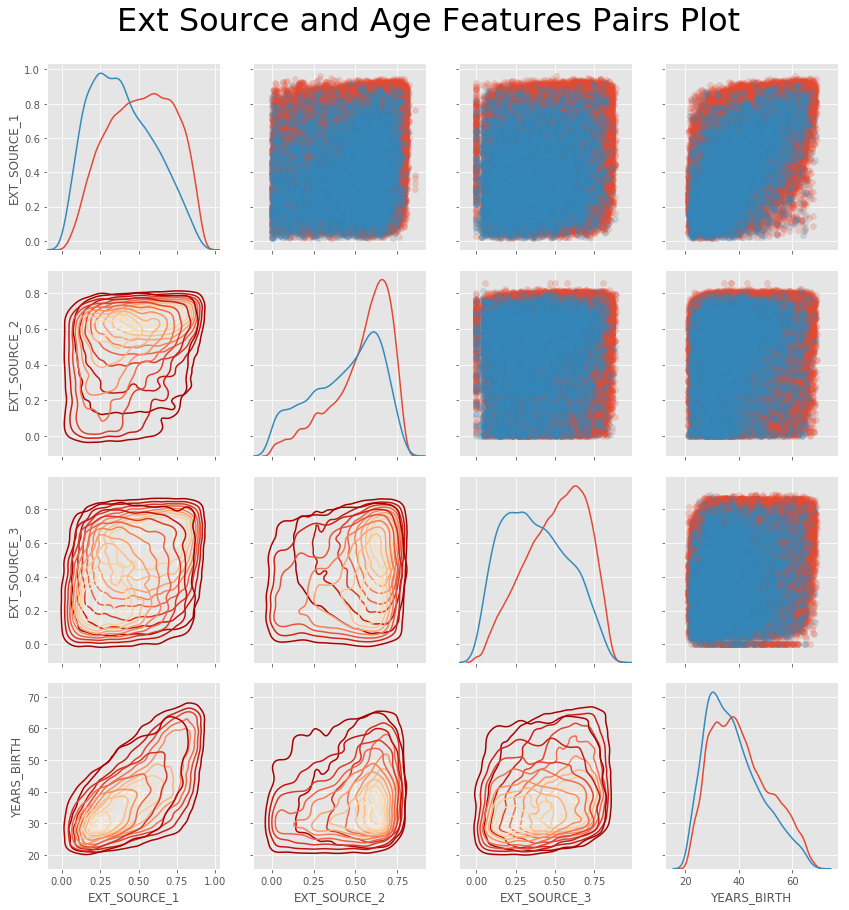

In [9]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

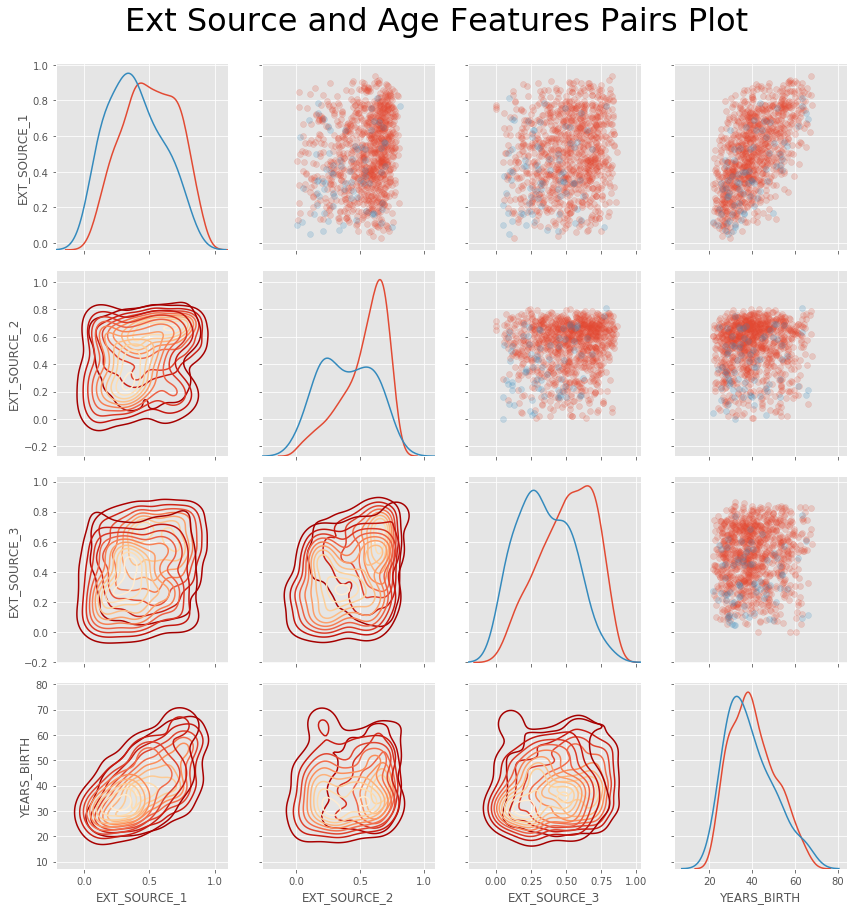

In [10]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

## 作業
### 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
### 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
### 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

In [21]:
rand_10_10=(np.random.rand(10,10)-0.5)*2

In [22]:
rand_10_10

array([[ 0.37121252,  0.6773364 , -0.42972539,  0.63997017,  0.14171146,
        -0.84003119, -0.92063034, -0.25810593,  0.82330486,  0.14868234],
       [-0.2106917 , -0.81411426, -0.94006605, -0.0616662 , -0.55441517,
         0.01777273,  0.90647226, -0.27360343, -0.59974131, -0.83680245],
       [-0.00228733,  0.17320034,  0.99896349,  0.00727665, -0.31627165,
         0.90607398, -0.59183155, -0.56873057, -0.06140884,  0.27690832],
       [-0.8292322 ,  0.12870914, -0.84368685,  0.95700687,  0.49684822,
        -0.49302437, -0.97039303,  0.6439329 ,  0.4563708 ,  0.20035776],
       [-0.09900724,  0.85645449,  0.62233877,  0.18017339,  0.36089654,
        -0.42480157, -0.55969163, -0.8421773 ,  0.76341499, -0.47601778],
       [-0.78029495, -0.42896809, -0.69882514,  0.37539806,  0.16375556,
         0.86803167, -0.03628288, -0.64259908, -0.84344378, -0.35477103],
       [ 0.9519696 , -0.46050849,  0.2065267 , -0.07094102,  0.24782837,
        -0.46405101, -0.82311456, -0.95608489

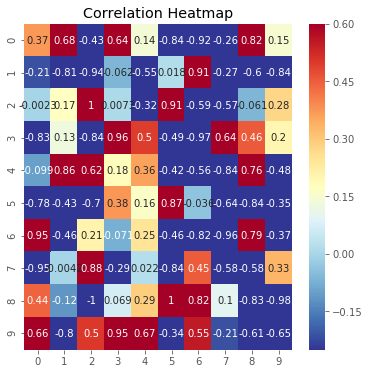

In [24]:
plt.figure(figsize = (6, 6))
sns.heatmap(rand_10_10, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [25]:
rand_1000_3=(np.random.rand(1000,3)-0.5)*2

In [29]:
rand_1000_3
dataset = pd.DataFrame({'Column1':rand_1000_3[:,0],'Column2':rand_1000_3[:,1],'Column3':rand_1000_3[:,2]})
print(dataset)

      Column1   Column2   Column3
0   -0.374984  0.815932 -0.219706
1    0.641908  0.446664 -0.671738
2    0.334563 -0.123296 -0.356264
3   -0.698001 -0.759883 -0.055680
4    0.304922  0.455456  0.564617
5    0.235278  0.687153  0.410264
6    0.969837 -0.666250 -0.461601
7   -0.938135  0.009236  0.118688
8   -0.728725 -0.025741 -0.815283
9   -0.775245  0.475964 -0.428112
10   0.176041 -0.150026  0.609391
11   0.436608 -0.920519 -0.313236
12  -0.854774 -0.520325 -0.024982
13  -0.850541 -0.092867 -0.669531
14   0.732358  0.973648 -0.276690
15   0.531766 -0.601368 -0.648619
16  -0.487093 -0.923905 -0.087169
17   0.227643 -0.686903 -0.064301
18   0.026598  0.396133 -0.675955
19  -0.399184  0.556873 -0.770063
20  -0.863904  0.834286  0.863713
21  -0.505201  0.072419  0.145296
22   0.592764 -0.264447  0.529874
23   0.045064  0.405567 -0.969374
24  -0.608844  0.797275 -0.199393
25   0.245372  0.459872  0.481026
26   0.713795 -0.213851  0.076319
27   0.236859 -0.543510  0.946014
28   0.534989 

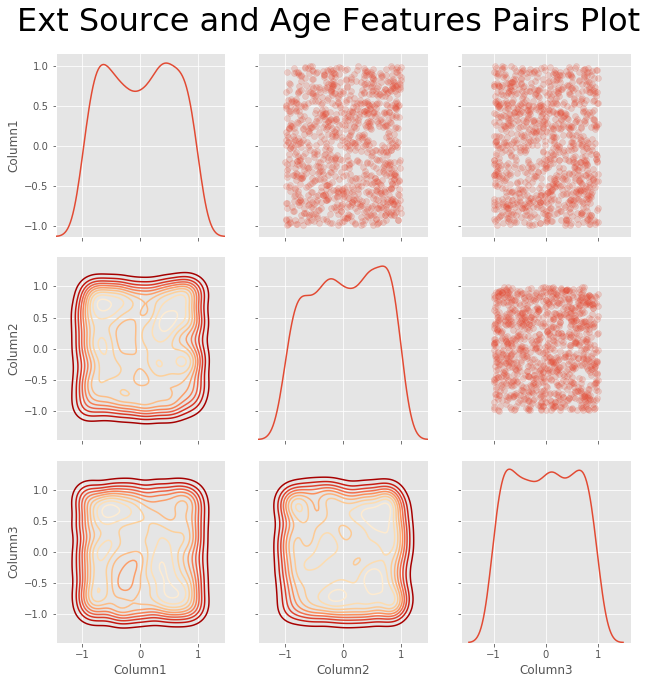

In [30]:

# 建立 pairgrid 物件
grid = sns.PairGrid(data = dataset, size = 3, diag_sharey=False)

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

In [33]:
normal_1000_3=np.random.normal(loc=0.0, scale=1.0, size=[1000,3])

In [34]:
normal_1000_3

array([[ 1.50108991, -1.17770186,  1.40600477],
       [-1.14723602, -3.05044315, -0.98481252],
       [ 0.9925497 ,  0.27853519,  1.28220021],
       ...,
       [-0.63130163, -1.31229785,  0.14917437],
       [ 0.07408326, -0.96228078, -0.60682392],
       [-1.41949521,  0.22218923,  1.00772079]])

In [35]:
dataset_gausian = pd.DataFrame({'Column1':normal_1000_3[:,0],'Column2':normal_1000_3[:,1],'Column3':normal_1000_3[:,2]})
print(dataset_gausian)

      Column1   Column2   Column3
0    1.501090 -1.177702  1.406005
1   -1.147236 -3.050443 -0.984813
2    0.992550  0.278535  1.282200
3   -0.010051 -0.837216 -0.320362
4   -1.263952 -1.673005 -0.652007
5    0.526198  0.108730  1.221487
6   -0.340161  2.591621 -0.295306
7   -1.024614  0.562271 -0.224409
8    0.747814  0.577072 -0.261889
9    0.686896  1.215629 -2.185345
10   0.028164  1.005967 -1.051563
11  -0.493456 -2.266576 -0.911957
12  -1.047989 -0.086389 -0.912269
13   0.552034  0.553954 -0.024180
14   2.081890 -0.096844  0.077535
15   0.111227  0.854138  0.158314
16  -1.169245 -1.841425 -0.829705
17   0.748965 -0.547248  0.074217
18   1.707056  1.862010 -0.745339
19  -1.961545 -1.061669  1.047135
20  -0.123689 -0.823734 -1.012256
21   0.658993  0.812204 -0.727485
22   0.172996  0.956012  0.812749
23   0.594595  1.606902 -0.127629
24   0.692487  1.044641 -0.588620
25  -0.999142 -0.305119  0.714664
26   1.681732 -0.428005  0.997787
27   1.227927 -0.070900 -0.586974
28  -1.915331 

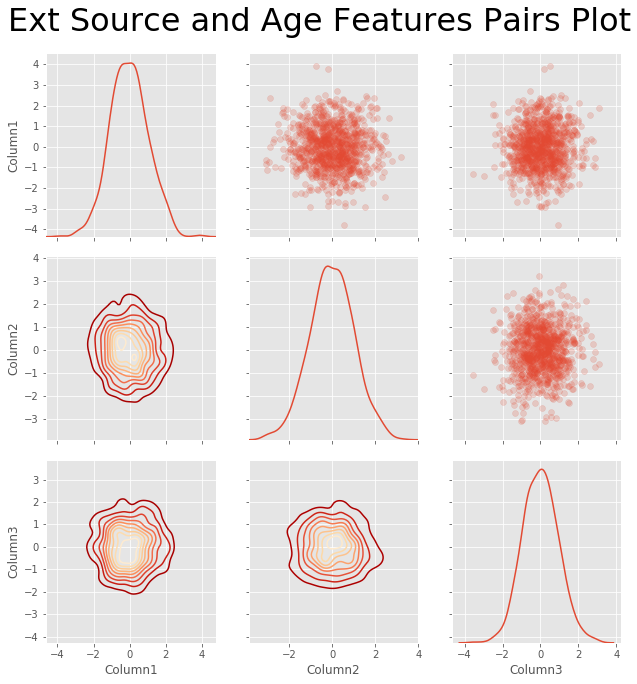

In [36]:
# 建立 pairgrid 物件
grid = sns.PairGrid(data = dataset_gausian, size = 3, diag_sharey=False)

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()